In [8]:
import os
os.getcwd()

'/Users/csivakorn/dev/spectral'

### File Reader Information:

Utilizing this package: https://github.com/spectralpython/spectral/tree/master?tab=readme-ov-file

The file will look at the header file (.hdr) and use that as a guide to extract data from .spe file.

RGB is automatically generated from the 3 channels.

Image dimension: 	Data Source:   './../hyperspectral_dev/data/cotton.spe'
	# Rows:           1018
	# Samples:         208
	# Bands:           217
	Interleave:        BIL
	Quantization:  64 bits
	Data format:   float64


/Users/csivakorn/dev/spectral/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


<Figure size 1200x600 with 0 Axes>

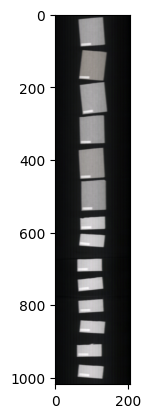

In [14]:
import matplotlib.pyplot as plt
from spectral import *

# Provide the path to your ENVI header file
header_file = '../hyperspectral_dev/data/cotton.hdr'
data_file = '../hyperspectral_dev/data/cotton.spe'

# Open the ENVI image
image1 = envi.open(header_file, image=data_file)

# Display the specific bands using imshow
# Note: Band indices are zero-based in Python, so adjust accordingly.
plt.figure(figsize=(12, 6))

# Displaying the specified bands
# Example: Displaying bands 29, 19, and 9
view = imshow(image1, bands=(29,19,9))  # 29, 19, 9 are band indices

# view = imshow(image)

print("Image dimension:", image1)


Image dimension: 	Data Source:   './../hyperspectral_dev/data/polyester.spe'
	# Rows:            710
	# Samples:         208
	# Bands:           217
	Interleave:        BIL
	Quantization:  64 bits
	Data format:   float64


/Users/csivakorn/dev/spectral/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


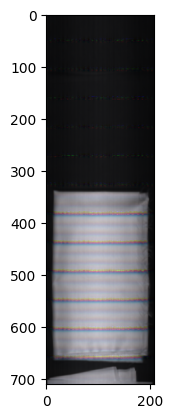

In [45]:
import matplotlib.pyplot as plt
from spectral import *

# Provide the path to your ENVI header file
header_file = '../hyperspectral_dev/data/polyester.hdr'
data_file = '../hyperspectral_dev/data/polyester.spe'

# Open the ENVI image
image2 = envi.open(header_file, image=data_file) 

# Displaying the specified bands
# Example: Displaying bands 29, 19, and 9
view = imshow(image2, bands=(210,200,190))  # 29, 19, 9 are band indices

print("Image dimension:", image2)

## Show the spectral data at certain location

In [16]:
# Access the metadata (which includes wavelength information)
metadata = image2.metadata

# Extract wavelengths from metadata
if 'wavelength' in metadata:
    wavelengths = metadata['wavelength']
    print(wavelengths)
else:
    print("No wavelength data found in the header file.")

['952.57', '955.92', '959.28', '962.64', '965.78', '969.16', '972.54', '975.92', '979.31', '982.70', '986.10', '989.49', '992.90', '996.30', '999.71', '1003.12', '1006.54', '1009.96', '1013.38', '1016.80', '1020.23', '1023.66', '1027.10', '1030.53', '1033.97', '1037.42', '1040.86', '1044.31', '1047.76', '1051.22', '1054.67', '1058.13', '1061.59', '1065.06', '1068.52', '1071.99', '1075.46', '1078.94', '1082.41', '1085.89', '1089.37', '1092.85', '1096.34', '1099.82', '1103.31', '1106.80', '1110.29', '1113.79', '1117.28', '1120.78', '1124.28', '1127.78', '1131.28', '1134.78', '1138.29', '1141.79', '1145.30', '1148.81', '1152.32', '1155.83', '1159.35', '1162.86', '1166.38', '1169.89', '1173.41', '1176.93', '1180.45', '1183.97', '1187.49', '1191.01', '1194.53', '1198.06', '1201.58', '1205.10', '1208.63', '1212.15', '1215.68', '1219.21', '1222.73', '1226.26', '1229.79', '1233.32', '1236.84', '1240.37', '1243.90', '1247.43', '1250.95', '1254.48', '1258.01', '1261.54', '1265.06', '1268.59', '1

In [34]:
## Plot the spectral at selected location
import matplotlib.ticker as ticker

def plot_spectral(img, row, col):
    data = img.load()
    individual_spectral = data[row, col, :]
    individual_spectral = individual_spectral.flatten()
    spectral_axis = img.metadata['wavelength']

    # Create the plot
    plt.plot(spectral_axis, individual_spectral, marker='o', linestyle='-', color='b')

    # Add labels and title
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Spectral Value')
    plt.title('Spectral Data')

    # Use MaxNLocator to make xticks more sparse at a constant interval
    ax = plt.gca()  # Get the current axis
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=30))
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()


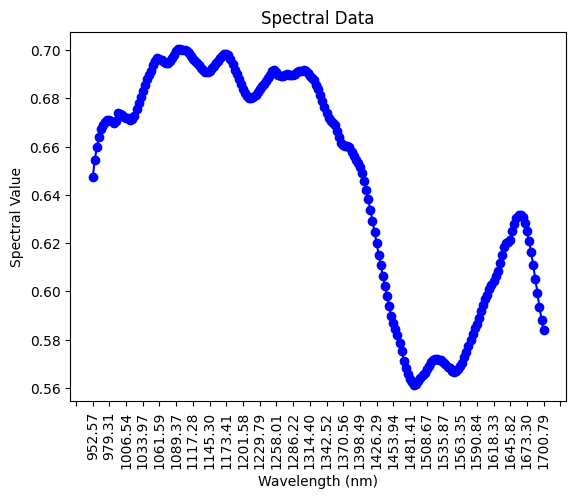

In [48]:
## This is for cotton
plot_spectral(image1, 430, 100)

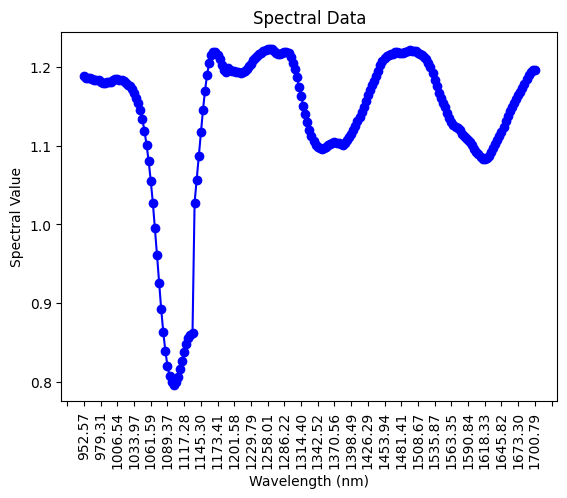

In [52]:
## This is for polyester

plot_spectral(image2, 400, 100)